In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Users/miroslavbatchkarov/NetBeansProjects/ExpLosion


In [2]:
s = {'document_features_ev': 'AN+NN',
     'document_features_tr': 'J+N+AN+NN',
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
     'expansions__entries_of_id': None,
     'expansions__k': 3,
     'expansions__neighbour_strategy': 'linear',
     'expansions__noise': 0.0,
     'expansions__use_random_neighbours': 0,
     'expansions__use_similarity': 0,
     'expansions__vectors__algorithm': 'word2vec',
#      'expansions__vectors__composer': 'Add',
     'expansions__vectors__dimensionality': 100,
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled': 'wiki',
     'expansions__vectors__unlabelled_percentage__in': [100],
     'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
fields = {'unlab': 'expansions__vectors__unlabelled',
            'percent': 'expansions__vectors__unlabelled_percentage',
            'Composer': 'expansions__vectors__composer',
            'Overlap': 'expansions__allow_overlap'}
print('ids are', ids, 'total', len(ids))
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
df.Overlap = df.Overlap.map({'1': 'Allowed', '0': 'Not allowed'})

ids are [34, 35, 36, 37, 209, 212, 215, 218] total 8
Calculating CI for exp 209
Calculating CI for exp 212
Calculating CI for exp 215
Calculating CI for exp 218
unlab has 4000 values
Overlap has 4000 values
Accuracy has 4000 values
Composer has 4000 values
percent has 4000 values
folds has 4000 values


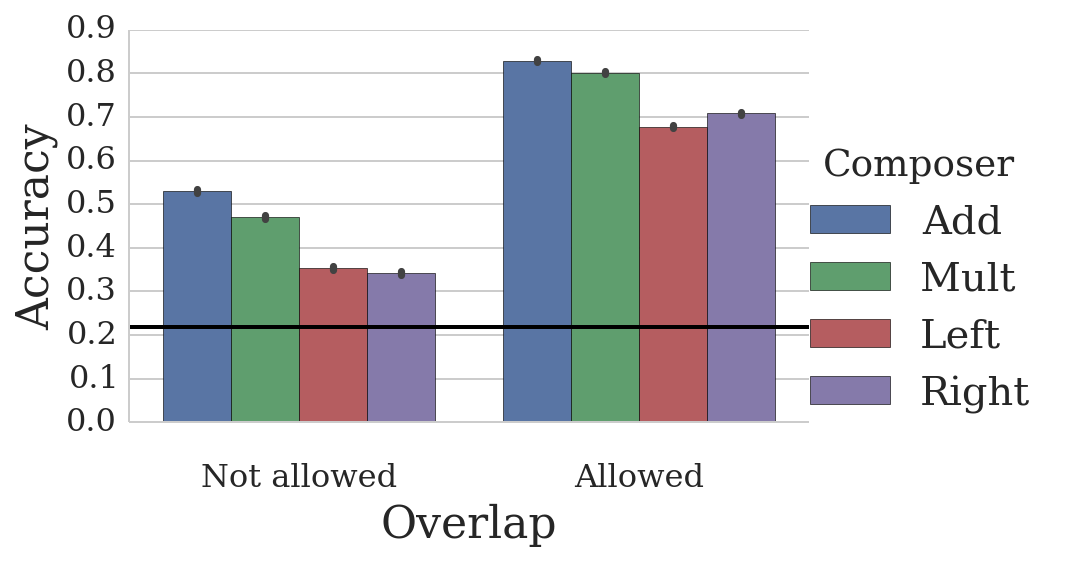

In [4]:
sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

g = sns.factorplot(y='Accuracy', hue='Composer', x='Overlap', 
                   x_order=['Not allowed', 'Allowed'], 
                   data=df, kind='bar', ci=68, aspect=1.5);
for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
    ax.axhline(nondistributional_baseline(**settings_of(ids[0])), c='k');
g.savefig('plot-nps-with-lexical-overlap.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [12]:
df.groupby(['Overlap', 'Composer']).mean()

Accuracy  folds
Overlap     Composer                 
Allowed     Add       0.828543  249.5
            Left      0.678175  249.5
            Mult      0.800687  249.5
            Right     0.705904  249.5
Not allowed Add       0.529018  249.5
            Left      0.352847  249.5
            Mult      0.470691  249.5
            Right     0.337056  249.5